# Metadata
- Title: Final Project Report
- Class: DS 5100
- Date: 07/15/2022
- Student Name: Mauricio Mathey Garcia-Rada
- Student Net ID: qwa2uc
- This URL: https://github.com/mmatheygr/final_project/blob/main/Final%20project.ipynb
- GitHub Repo URL: https://github.com/mmatheygr/final_project

# Monte Carlo module

In [5]:
### Import packages
import pandas as pd
import numpy as np
from montecarlo import die
from montecarlo import game
from montecarlo import analyzer

### Die class

In [1]:
### Class die
class die:
    '''A die has N sides, or “faces”, and W weights, and can be rolled to select a face. 
    W defaults to 1.0 for each face but can be changed after the object is created.
    Note that the weights are just numbers, not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.
    Note that what we are calling a “die” here can be any discrete random variable
    associated with a stochastic process, such as using a deck of cards or flipping
    a coin or speaking a language. Our probability model for such variable is, however,
    very simple – since our weights apply to only to single events, we are assuming that
    the events are independent. This makes sense for coin tosses but not for language use.'''
    def __init__(self, sides):
        self.sides = sides
        self.weights = [1]*len(self.sides)
        self.__die = pd.DataFrame({'side': self.sides, 'weight': self.weights})
    
    def changew(self, side, weight):
        '''Allows to change the weight of a side, it takes to arguments, the first
        one is the side and the second one is the weight which should be a number.'''
        if side in self.sides:
            if (type(weight) == float) or (type(weight) == int):
                self.__die.loc[self.__die['side'] == side, 'weight'] = weight
            else:
                print("Weights must be a number")
        else:
            print("Specified side is not defined")
    
    def roll(self, rolls = None):
        '''Allows to roll the dice, you only specify the number of rolls, if not
        specified it defaults to 1.'''
        number_rolls = 1 if rolls is None else rolls
        _roll_results = []
        for i in range(1, number_rolls + 1):
            result = self.__die.side.sample(weights = self.__die.weight).values[0]
            _roll_results.append(result)
        return _roll_results
    
    def show(self):
        '''Displays the die sides and weights, no aditional input needed.'''
        return self.__die

### Game class

In [2]:
### Class game
class game:
    '''A game consists of rolling of one or more dice of the same kind one or more times. 
    Each game is initialized with one or more of similarly defined dice (Die objects).
    By “same kind” and “similarly defined” we mean that each die in a given game has
    the same number of sides and associated faces, but each die object may have its own weights.
    The class has a behavior to play a game, i.e. to rolls all of the dice a given number of times.
    The class keeps the results of its most recent play.'''
    def __init__(self, object):
        self.object = object
        
    def play(self, rolls):
        '''Allows to rolls the objects, just need to specify the number of rolls.'''
        self.__game_results = pd.DataFrame([])
        for i in range(0, len(self.object)):
            self.__game_results[i] =  self.object[i].roll(rolls)
    
    def show(self, wide = None):
        '''Allows to show the results of the game. It has an optional input
        which is True or False. If True it shows the results in wide format, if
        False it shows the results in narrow format. It defaults to True.'''
        self.wide = True if wide is None else False
        if self.wide:
            return(self.__game_results)
        else:
            return(self.__game_results.unstack(fill_value = 0).T)

### Analyzer class

In [3]:
### Class analyzer
class analyzer:
    '''An analyzer takes the results of a single game and computes various
    descriptive statistical properties about it. These properties results are
    available as attributes of an Analyzer object.'''
    def __init__(self, results):
        self.analyze = results.show()
        self.data_type = type(self.analyze.iloc[0,0])
        self.jackpot_play = []

    def jackpot(self):
        '''Identifies the number of times all the faces are the same. No input needed.'''
        number = 0
        for i in range(0, self.analyze.shape[0]):
            length_row = len(set(self.analyze.iloc[i,:]))
            if length_row == 1:
                play = [i, self.analyze.iloc[i,0]]
                self.jackpot_play.append(play)
                number += 1
        self.jackpot_play = pd.DataFrame(self.jackpot_play)
        self.jackpot_play.columns = ['Play', 'Side']
        self.jackpot_play.set_index('Play', inplace = True)
        return number
    
    def combo(self):
        '''You get the combination of faces obtained during the rolls.
        No input needed'''
        column_names = list(self.analyze.columns)
        combos = pd.DataFrame(self.analyze.groupby(column_names).size())
        combos = combos.rename(columns = {0:'Counts'})
        combos.sort_values(by = 'Counts', ascending = False, inplace = True)
        return combos
    
    def face_counts(self):
        '''You get the face counts for each roll. No input needed.'''
        counts_df = pd.DataFrame(self.analyze.unstack(fill_value = 0).T).reset_index(level = 0)
        counts_df = pd.crosstab(counts_df.index, counts_df.iloc[:,1])
        return counts_df

# Test module

In [ ]:
import unittest
from montecarlo import die
from montecarlo import game
from montecarlo import analyzer

class MontecarloTestSuite(unittest.TestCase):
    
    def test_changew_show(self):
    #The assumption here is that if the die is not correctly created I would not
    #be able to change the weight, therefore I am not testing for the creation of the
    #die. Furthermore, to test the correct change of weight I also need to test that
    #show is working so I can reference the cell and validate that the weight was changed,
    #this is why I'm also including the show test in this function.
        die1 = [1,2,3,4,5]
        test1 = die(die1)
        test1.changew(1,5)
        
        expected_value = 5
        real_value = test1.show().iloc[0,1]
        self.assertEqual(real_value, expected_value)
        
    def test_roll(self):
        #Roll do need an independent testing to verify tht it is working correctly.
        die1 = [1,2,3,4,5]
        test2 = die(die1)
        
        self.assertEqual(len(test2.roll(5)), 5)
    
    def test_play_show(self):
        #A similar logic is followed here, if the object is being created correctly
        #then I would be able to load it onto the game class and to test that it has been
        #correctly interpreted I test play. If play works, then I can be sure that the
        #basics are correct.
        die1 = die([1,2,3,4,5])
        dies_test = [die1,die1]
        test3 = game(dies_test)
        test3.play(5)
        
        self.assertEqual(len(test3.show().index), 5)
    
    def test_jackpot(self):
        #Jackpot, combo, and face counts do need their own testing functions, which
        #is what I did from this moment onwards
        die1 = die([1,2,3,4,5])
        dies_test = [die1,die1]
        test4a = game(dies_test)
        test4a.play(100)
        
        expected_type = type(analyzer(test4a).jackpot())
        
        self.assertTrue(expected_type == int)
    
    def test_combo(self):
        die1 = die([1,2,3,4,5])
        dies_test = [die1,die1]
        test5a = game(dies_test)
        test5a.play(100)
        test5b = analyzer(test5a)
        
        self.assertFalse(test5b.combo().empty)
    
    def test_face_count(self):
        die1 = die([1,2,3,4,5])
        dies_test = [die1,die1]
        test6a = game(dies_test)
        test6a.play(5)
        test6b = analyzer(test6a)
        
        self.assertFalse(test6b.face_counts().empty)

if __name__ == '__main__':
    
    unittest.main(verbosity=3)

# Test results

# Scenarios

#### Results from this section may be different from the results in the scenarios file because I reran the code here to show the results.

In [ ]:
### Import required packages
import pandas as pd
import numpy as np
from montecarlo import die
from montecarlo import game
from montecarlo import analyzer

### Scenario 1

<AxesSubplot:xlabel='Type'>

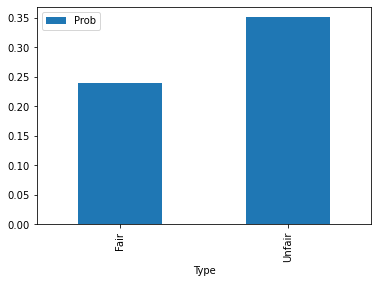

In [27]:
### Create coins
fair_coin = die(['H', 'T'])
unfair_coin = die(['H', 'T'])
unfair_coin.changew('H',5)

### Create dices for games
fair_dices = [fair_coin, fair_coin, fair_coin]
unfair_dices =[fair_coin, unfair_coin, unfair_coin]

### Run fair game
fair_game = game(fair_dices)
fair_game.play(1000)

### Run unfair game
unfair_game = game(unfair_dices)
unfair_game.play(1000)

### Run analyzer for both
fair_jackpots = analyzer(fair_game).jackpot()
unfair_jackpots = analyzer(unfair_game).jackpot()

### Compute relative frequency
rel_fair = fair_jackpots/1000
rel_unfair = unfair_jackpots/1000
df = pd.DataFrame(['Fair','Unfair'],[rel_fair,rel_unfair]).reset_index(level = 0)
df.columns = ['Prob', 'Type']
df.plot.bar(x = 'Type', y = 'Prob')

### Scenario 2

<AxesSubplot:xlabel='Type'>

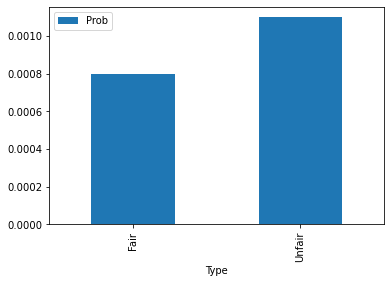

In [29]:
### Create dies
fair_die = die([1,2,3,4,5,6])
unfair_die1 = die([1,2,3,4,5,6])
unfair_die1.changew(6,5)
unfair_die2 = die([1,2,3,4,5,6])
unfair_die2.changew(1,5)

### Run fair game
fair_game_dices = [fair_die, fair_die, fair_die, fair_die, fair_die]
fair_game = game(fair_game_dices)
fair_game.play(10000)

### Run unfair game
unfair_game_dices = [unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die]
unfair_game = game(unfair_game_dices)
unfair_game.play(10000)

### Run analyzer for both
fair_jackpots = analyzer(fair_game).jackpot()
unfair_jackpots = analyzer(unfair_game).jackpot()

rel_fair = fair_jackpots/10000
rel_unfair = unfair_jackpots/10000
df = pd.DataFrame(['Fair','Unfair'],[rel_fair,rel_unfair]).reset_index(level = 0)
df.columns = ['Prob', 'Type']
df.plot.bar(x = 'Type', y = 'Prob')

<AxesSubplot:xlabel='Combo'>

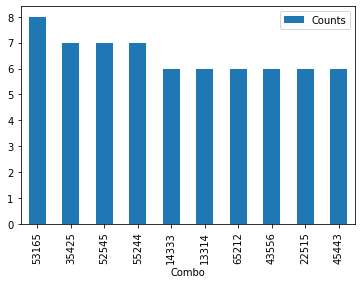

In [30]:
### Top 10 for fair game
top_10_fair = pd.DataFrame(analyzer(fair_game).combo().head(10))
top_10_fair.reset_index(inplace = True)
top_10_fair['Combo'] = top_10_fair.iloc[:,0].map(str) + top_10_fair.iloc[:,1].map(str) + top_10_fair.iloc[:,2].map(str) + top_10_fair.iloc[:,3].map(str) + top_10_fair.iloc[:,4].map(str)
top_10_fair.plot.bar(x = 'Combo', y = 'Counts')

<AxesSubplot:xlabel='Combo'>

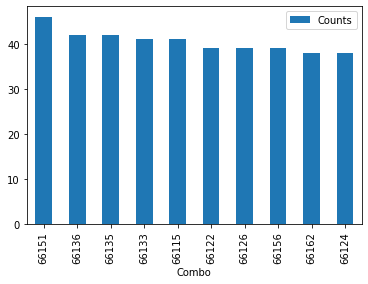

In [31]:
### Top 10 for unfair game
top_10_unfair = pd.DataFrame(analyzer(unfair_game).combo().head(10))
top_10_unfair.reset_index(inplace = True)
top_10_unfair['Combo'] = top_10_unfair.iloc[:,0].map(str) + top_10_unfair.iloc[:,1].map(str) + top_10_unfair.iloc[:,2].map(str) + top_10_unfair.iloc[:,3].map(str) + top_10_unfair.iloc[:,4].map(str)
top_10_unfair.plot.bar(x = 'Combo', y = 'Counts')

### Scenario 3

In [32]:
### Create letters list
letters = []
for i in range(ord('A'), ord('Z')+1):
    letters.append(chr(i))
    
### Create die letters
die_letters = die(letters)

### Get weights for each letter
weights = pd.DataFrame([['A',8.4966],
['B',2.0720],
['C',4.5388],
['D',3.3844],
['E',11.1607],
['F',1.8121],
['G',2.4705],
['H',3.0034],
['I',7.5448],
['J',0.1965],
['K',1.1016],
['L',5.4893],
['M',3.0129],
['N',6.6544],
['O',7.1635],
['P',3.1671],
['Q',0.1962],
['R',7.5809],
['S',5.7351],
['T',6.9509],
['U',3.6308],
['V',1.0074],
['W',1.2899],
['X',0.2902],
['Y',1.7779],
['Z',0.2722]])
weights.columns = ['Letter', 'Weight']

### Change weights
for i in range(0,25):
    die_letters.changew(weights.Letter[i],float(weights.Weight[i]))

### Create dice and run game
die_combination = [die_letters, die_letters, die_letters, die_letters, die_letters]
game_letters = game(die_combination)
game_letters.play(1000)

### Check combos
analyzer(game_letters).combo().head(60)

Counts
0 1 2 3 4        
A A C P P       1
O P E E L       1
  N G I R       1
    L H A       1
    U A G       1
    Z N E       1
  O H I P       1
    I A I       1
    M H U       1
      R T       1
    N F B       1
      X Y       1
    P H A       1
    R C N       1
    T B N       1
  P I N E       1
  U E K O       1
  R D O I       1
    E N L       1
    L O T       1
    N T P       1
    O P M       1
    Y A M       1
  S D E V       1
  T D T S       1
    K A P       1
    N E W       1
    O H U       1
    U E R       1
  U A I A       1
  N E G O       1
    D U A       1
    A L F       1
  M U R C       1
  A E F M       1
    G A T       1
    H H W       1
    M E A       1
    N A V       1
    U L M       1
  B I O I       1
  C A S X       1
    M I P       1
    O E P       1
      L L       1
    T H I       1
  E I Y I       1
    O I E       1
    S L P       1
  F D N R       1
  G K E L       1
  I A O G       1
    B D P       1
    E O I       1
      S V       1
    G S C       1
    L H O       1
    O A Y       1
    T N A       1
  L E T T       1

From scenarios file and not adhoc to this results:
It looks like there are very few english words, in the top 60 I don't see any, so my guess would be that less than 1/60 of the permutations are words.

# Directory listing

In [35]:
!dir /s

 Volume in drive C is OS
 Volume Serial Number is 9E20-49A0

 Directory of C:\Users\Mauricio\Documents\MSDS\DS5100\Final project

07/13/2022  07:10 PM    <DIR>          .
07/07/2022  05:40 AM    <DIR>          ..
07/13/2022  04:00 PM    <DIR>          .ipynb_checkpoints
07/13/2022  07:00 PM            70,445 Final project.ipynb
07/13/2022  06:57 PM             1,085 LICENSE
07/13/2022  09:30 AM             5,403 montecarlo.py
07/13/2022  06:57 PM    <DIR>          montecarlosim
07/13/2022  06:57 PM             2,678 montecarlo_tests.py
07/13/2022  06:57 PM               778 README.md
07/13/2022  06:57 PM            54,484 Scenarios.ipynb
07/13/2022  06:57 PM               159 setup.py
07/13/2022  06:57 PM             1,418 test_results.txt
07/13/2022  09:37 AM    <DIR>          __pycache__
               8 File(s)        136,450 bytes

 Directory of C:\Users\Mauricio\Documents\MSDS\DS5100\Final project\.ipynb_checkpoints

07/13/2022  04:00 PM    <DIR>          .
07/13/2022  07:10 PM   

# Installation output

In [36]:
!pip install -e .

Obtaining file:///C:/Users/Mauricio/Documents/MSDS/DS5100/Final%20project
  Running setup.py develop for monte-carlo-simulation
